## Radial Distribution Function Demo Notebook

This notebook demonstrates how to plot an RDF using data generated from LAMMPS.

### Imports

In [2]:
import sys
sys.path.append('../../lib')
import pyrdf

For the case where the RDF is cumulative; that is, the RDF file written on disk in `./single_rdf_sample.rdf` contains data for only a single RDF:

In [4]:
single_rdf_file = '../data/single_rdf_sample.rdf'
num_bin = 100
cumul = True

_, single_rdf = pyrdf.read_rdf_arrays(single_rdf_file, num_bin=num_bin, cumul=cumul)

To plot a single RDF, use `pyrdf.plot_rdf`.

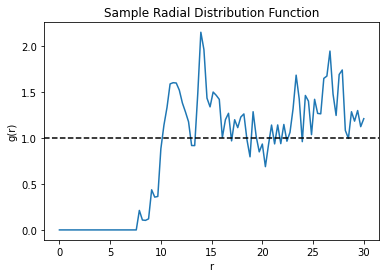

In [3]:
cutoff = 30
plot_title = 'Sample Radial Distribution Function'

pyrdf.plot_rdf(cutoff, num_bin, single_rdf, plot_title=plot_title)

For the case where the file has data for multiple RDFs, `pyrdf.read_rdf_arrays` can still be used for read-in capabilities, but `cumul` would needs to be set to False. For the example file `./multiple_rdf_sample.rdf`, there are a total of 9 different RDF scans each with 100 bins; therefore, the output numpy array storing the RDFs, `multiple_rdf`, will be 9 by 100. 

In [5]:
multiple_rdf_file = '../data/multiple_rdf_sample.rdf'
num_bin = 100
cumul = False

_, multiple_rdf = pyrdf.read_rdf_arrays(multiple_rdf_file, num_bin=num_bin, cumul=cumul)

In [6]:
multiple_rdf.shape

(9, 100)

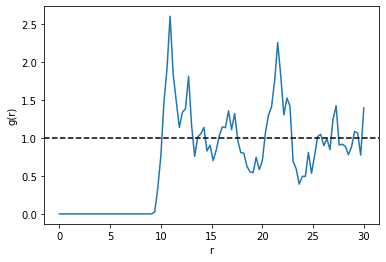

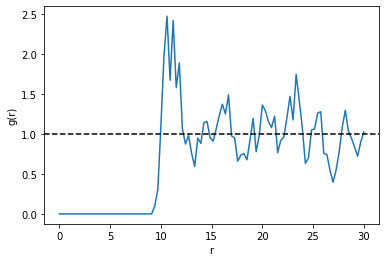

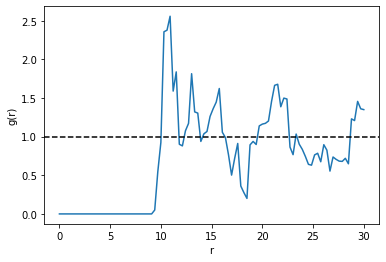

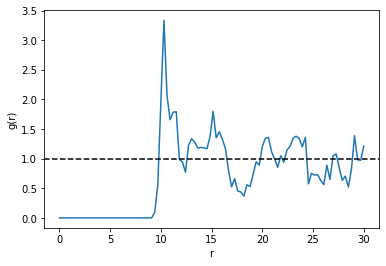

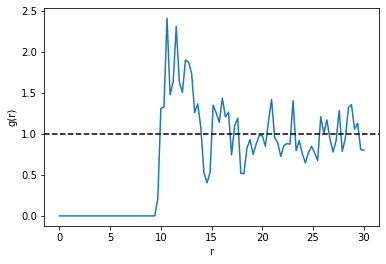

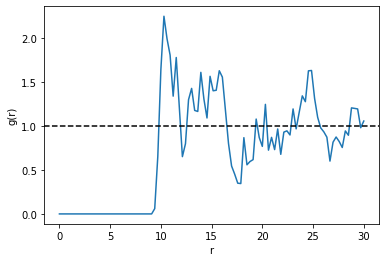

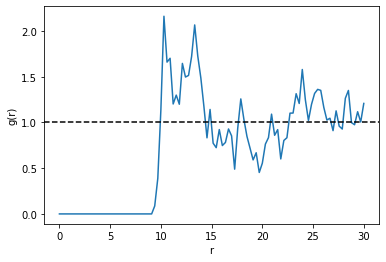

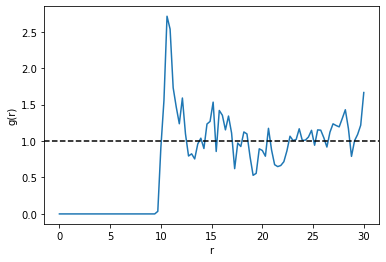

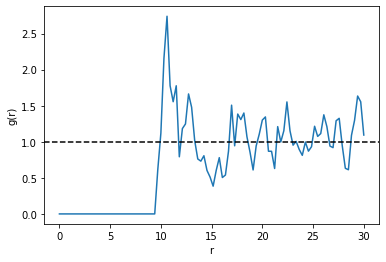

In [7]:
cutoff = 30

for rdf in multiple_rdf:
    pyrdf.plot_rdf(cutoff, num_bin, rdf)

When multiple RDFs need to be parsed from multiple files and be combined as a single numpy array, use `pyrdf.read_multiple_files` instead.

In [8]:
average = True
args = ['../data/rdf_data_sample/'+str(i)+'/cumul_rdf.rdf' for i in [1, 2]]
kwargs = {
    'num_bin': 100,
    'cumul': True
}

multiple_files_rdf = pyrdf.read_multiple_files(average, *args, **kwargs)
multiple_files_rdf.shape

(100,)

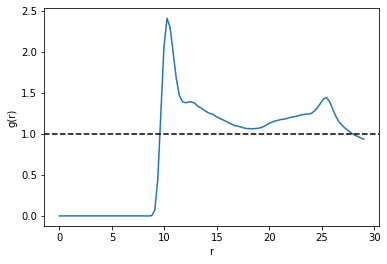

In [9]:
cutoff = 29
num_bin = 100

pyrdf.plot_rdf(cutoff, num_bin, multiple_files_rdf)

**Note:** Parameters in this notebook such as `num_bin` and `cutoff` take their corresponding values from when the system/simulation is setup in the LAMMPS input file.